# Web scraping

* 웹을 통해 자동으로 데이터를 수집하는 프로그램
    * 간편하게 데이터 수집 가능
    * 마크업 언어로 작성된 문서에서 필요한 정보만을 수집
    * Waeb crawling과 혼용되어 사용되지만 다소 차이가 존재
        * Crawling: 검색 결과로 유사한 정보의 데이터(=웹 페이지)를 모으는 것
        * Scraping: 웹 페이지에서 특정 데이터를 모으는 것

# Getting started

* 설치할 라이브러리
    * selenium
    * chromedriver-autoinstaller
    * Beatiful Soup
    * tqdm
    * urlopen
    * requests
    * pprint
        * 내장 라이브러리
        * 가독성있는 데이터 출력

## Installation

### selenium

* 동적 페이지 읽어오기

In [1]:
pip install selenium

     ---------------------------------------- 6.3/6.3 MB 33.5 MB/s eta 0:00:00
     ---------------------------------------- 384.9/384.9 kB ? eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### chromedriver-autoinstaller

* 버전에 맞는 드라이버 자동 설치

In [2]:
pip install chromedriver-autoinstaller

Note: you may need to restart the kernel to use updated packages.


### Beatiful Soup

* html 파싱

In [3]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


### tqdm

* 진행 상황 표시

In [4]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


### urlopen

* url 주소로 페이지 읽어오기
    * 정적 페이지 한정

In [1]:
pip install urlopen

  Using cached urlopen-1.0.0.zip (2.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for urlopen: filename=urlopen-1.0.0-py3-none-any.whl size=1383 sha256=1b2971668a61453af44b0d04896fc5422ead1b327e0ba525985e5f67b495e63f
  Stored in directory: c:\users\ngy\appdata\local\pip\cache\wheels\59\6a\b1\985d91ea20feea120e71e88fc5b085c5d57297a80645eb7e8c
Successfully built urlopen
Note: you may need to restart the kernel to use updated packages.


### requests

* api 호출을 위해 사용

In [6]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


### Etc.

* numpy
* pandas
* maplotlib
* seaborn

## Modules import

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import chromedriver_autoinstaller
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import requests
from pprint import pprint

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

font_path = "C:/Windows/Fonts/ARIAL.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## Driver import

* 생성된 크롬창 끄면 안 됨
* 웹 브라우저에 맞게 사용
    * 본 수업에서는 크롬 사용
* 스크래핑을 수행할 때마다 실행
    * 크롬이 업데이트될 때마다 버전에 맞는 드라이버 자동 설치

```
chrome_ver = chromedriver_autoinstaller.get_chrome_version().split('.')[0]
s = Service(f'./{chrome_ver}/chromedriver.exe')

try:
    driver = webdriver.Chrome(service=s)   
except:
    chromedriver_autoinstaller.install(True)
    driver = webdriver.Chrome(service=s)

driver.implicitly_wait(10)
```

# HEARTHSTONE

## Deck info scraping

* 스크래핑할 사이트: HSReplay.net
> https://hsreplay.net/

In [4]:
chrome_ver = chromedriver_autoinstaller.get_chrome_version().split('.')[0]
s = Service(f'./{chrome_ver}/chromedriver.exe')

try:
    driver = webdriver.Chrome(service=s)   
except:
    chromedriver_autoinstaller.install(True)
    driver = webdriver.Chrome(service=s)

driver.implicitly_wait(10)

In [22]:
decks = []
startPage = 1
endPage = 14
for page in tqdm(range(startPage,startPage+endPage),desc="Get Deck List"):
    url = "https://hsreplay.net/decks/#page="+str(page)
    driver.get(url)
    time.sleep(2)
    bsObject = BeautifulSoup(driver.page_source, "html.parser")
    deckTags = bsObject.select("section.deck-list > ul > li > a")
    for deckTag in deckTags:
        deck = {}
        deckRow = deckTag.findChild("div",{"class":"row"})
        deck["클래스"] = deckTag["data-card-class"]
        deck["이름"] = deckRow.findChild("h3",{"class":"deck-name"}).get_text();
        deck["가루량"] = int(deckRow.findChild("span",{"class":"dust-cost"}).get_text().strip())
        deck["승률"] = float(deckRow.findChild("span",{"class":"win-rate"}).get_text().replace("%","").strip());
        deck["판수"] = int(deckRow.findChild("span",{"class":"game-count"}).get_text().replace(",","").strip());
        decks.append(deck);
decks = pd.DataFrame(decks)
decks.head()

#<a href="/decks/sPqZNdLt7FcLy5Bc9QrMeh/#gameType=RANKED_STANDARD" class="deck-tile" data-card-class="DEATHKNIGHT" style="background-image: url(&quot;https://art.hearthstonejson.com/v1/256x/HERO_11a.webp&quot;);"><div class="row"><div class="col-lg-2 col-md-2 col-sm-2 col-xs-6"><h3 class="deck-name" style="background-image: url(&quot;https://static.hsreplay.net/static/images/64x/class-icons/deathknight.png&quot;);">Blood Death Knight</h3><small><span class="dust-cost"><img src="https://static.hsreplay.net/static/images/dust.png" width="14" height="20" alt="Dust" aria-hidden="false">&nbsp;9360</span></small></div><div class="col-lg-1 col-md-1 col-sm-1 col-xs-3"><span class="win-rate">55.5%</span></div><div class="col-lg-1 col-md-1 col-sm-1 col-xs-3"><span class="game-count">610</span></div><div class="col-lg-1 col-md-1 hidden-sm hidden-xs"><span class="duration"><span><span class="glyphicon glyphicon-time" aria-hidden="true"></span> 10.5 분</span></span></div><div class="col-lg-1 hidden-md hidden-sm hidden-xs"><ul class="mana-curve"><li><span data-count="" data-cost="0" style="height: 0%;"></span></li><li><span data-count="2" data-cost="1" style="height: 22.2222%;"></span></li><li><span data-count="9" data-cost="2" style="height: 100%;"></span></li><li><span data-count="5" data-cost="3" style="height: 55.5556%;"></span></li><li><span data-count="5" data-cost="4" style="height: 55.5556%;"></span></li><li><span data-count="2" data-cost="5" style="height: 22.2222%;"></span></li><li><span data-count="3" data-cost="6" style="height: 33.3333%;"></span></li><li><span data-count="4" data-cost="7+" style="height: 44.4444%;"></span></li></ul></div><div class="col-lg-6 col-md-7 col-sm-8 hidden-xs"><ul class="card-list"><li><div class="tooltip-wrapper"><a href="/cards/80818/-" tabindex="-1" class="card-icon-link"><div class="card-icon" role="img" aria-label="시체 자루꾼 ×2" style="height: 34px; width: 34px; background-image: url(&quot;https://art.hearthstonejson.com/v1/tiles/RLK_503.webp&quot;); background-position: -70px 0px; background-size: 126px 32px;"><span aria-hidden="true" style="color: rgb(244, 212, 66); font-size: 1em; right: 0px; top: 0px;">×2</span></div></a></div></li><li><div class="tooltip-wrapper"><a href="/cards/86626/-" tabindex="-1" class="card-icon-link"><div class="card-icon" role="img" aria-label="아스탈로르 블러드스원 ★" style="height: 34px; width: 34px; background-image: url(&quot;https://art.hearthstonejson.com/v1/tiles/RLK_222.webp&quot;); background-position: -70px 0px; background-size: 126px 32px;"><span aria-hidden="true" style="color: rgb(244, 212, 66); font-size: 1em; right: 0px; top: 0px;">★</span></div></a></div></li><li><div class="tooltip-wrapper"><a href="/cards/82088/" tabindex="-1" class="card-icon-link"><div class="card-icon" role="img" aria-label="절멸 ×2" style="height: 34px; width: 34px; background-image: url(&quot;https://art.hearthstonejson.com/v1/tiles/RLK_125.webp&quot;); background-position: -70px 0px; background-size: 126px 32px;"><span aria-hidden="true" style="color: rgb(244, 212, 66); font-size: 1em; right: 0px; top: 0px;">×2</span></div></a></div></li><li><div class="tooltip-wrapper"><a href="/cards/62583/-" tabindex="-1" class="card-icon-link"><div class="card-icon" role="img" aria-label="천리길 경비초소 ×2" style="height: 34px; width: 34px; background-image: url(&quot;https://art.hearthstonejson.com/v1/tiles/BAR_074.webp&quot;); background-position: -70px 0px; background-size: 126px 32px;"><span aria-hidden="true" style="color: rgb(244, 212, 66); font-size: 1em; right: 0px; top: 0px;">×2</span></div></a></div></li><li><div class="tooltip-wrapper"><a href="/cards/78356/" tabindex="-1" class="card-icon-link"><div class="card-icon" role="img" aria-label="혈기술사 ×2" style="height: 34px; width: 34px; background-image: url(&quot;https://art.hearthstonejson.com/v1/tiles/RLK_066.webp&quot;); background-position: -70px 0px; background-size: 126px 32px;"><span aria-hidden="true" style="color: rgb(244, 212, 66); font-size: 1em; right: 0px; top: 0px;">×2</span></div></a></div></li><li><div class="tooltip-wrapper"><a href="/cards/78345/" tabindex="-1" class="card-icon-link"><div class="card-icon" role="img" aria-label="흡혈 ×2" style="height: 34px; width: 34px; background-image: url(&quot;https://art.hearthstonejson.com/v1/tiles/RLK_051.webp&quot;); background-position: -70px 0px; background-size: 126px 32px;"><span aria-hidden="true" style="color: rgb(244, 212, 66); font-size: 1em; right: 0px; top: 0px;">×2</span></div></a></div></li><li><div class="tooltip-wrapper"><a href="/cards/85154/-" tabindex="-1" class="card-icon-link"><div class="card-icon" role="img" aria-label="네루비안 장로 ×2" style="height: 34px; width: 34px; background-image: url(&quot;https://art.hearthstonejson.com/v1/tiles/RLK_834.webp&quot;); background-position: -70px 0px; background-size: 126px 32px;"><span aria-hidden="true" style="color: rgb(244, 212, 66); font-size: 1em; right: 0px; top: 0px;">×2</span></div></a></div></li><li><div class="tooltip-wrapper"><a href="/cards/76312/-" tabindex="-1" class="card-icon-link"><div class="card-icon" role="img" aria-label="브란 브론즈비어드 ★" style="height: 34px; width: 34px; background-image: url(&quot;https://art.hearthstonejson.com/v1/tiles/CORE_LOE_077.webp&quot;); background-position: -70px 0px; background-size: 126px 32px;"><span aria-hidden="true" style="color: rgb(244, 212, 66); font-size: 1em; right: 0px; top: 0px;">★</span></div></a></div></li><li><div class="tooltip-wrapper"><a href="/cards/80647/-" tabindex="-1" class="card-icon-link"><div class="card-icon" role="img" aria-label="서리몰락 남작 ×2" style="height: 34px; width: 34px; background-image: url(&quot;https://art.hearthstonejson.com/v1/tiles/RLK_708.webp&quot;); background-position: -70px 0px; background-size: 126px 32px;"><span aria-hidden="true" style="color: rgb(244, 212, 66); font-size: 1em; right: 0px; top: 0px;">×2</span></div></a></div></li><li><div class="tooltip-wrapper"><a href="/cards/72007/-" tabindex="-1" class="card-icon-link"><div class="card-icon" role="img" aria-label="검귀 오카니 ★" style="height: 34px; width: 34px; background-image: url(&quot;https://art.hearthstonejson.com/v1/tiles/TSC_032.webp&quot;); background-position: -70px 0px; background-size: 126px 32px;"><span aria-hidden="true" style="color: rgb(244, 212, 66); font-size: 1em; right: 0px; top: 0px;">★</span></div></a></div></li><li><div class="tooltip-wrapper"><a href="/cards/78324/-" tabindex="-1" class="card-icon-link"><div class="card-icon" role="img" aria-label="죽음의 일격 ×2" style="height: 34px; width: 34px; background-image: url(&quot;https://art.hearthstonejson.com/v1/tiles/RLK_024.webp&quot;); background-position: -70px 0px; background-size: 126px 32px;"><span aria-hidden="true" style="color: rgb(244, 212, 66); font-size: 1em; right: 0px; top: 0px;">×2</span></div></a></div></li><li><div class="tooltip-wrapper"><a href="/cards/72598/-" tabindex="-1" class="card-icon-link"><div class="card-icon" role="img" aria-label="학교 선생님 ×2" style="height: 34px; width: 34px; background-image: url(&quot;https://art.hearthstonejson.com/v1/tiles/TSC_052.webp&quot;); background-position: -70px 0px; background-size: 126px 32px;"><span aria-hidden="true" style="color: rgb(244, 212, 66); font-size: 1em; right: 0px; top: 0px;">×2</span></div></a></div></li><li><div class="tooltip-wrapper"><a href="/cards/81206/-" tabindex="-1" class="card-icon-link"><div class="card-icon" role="img" aria-label="피의 소용돌이 ×2" style="height: 34px; width: 34px; background-image: url(&quot;https://art.hearthstonejson.com/v1/tiles/RLK_730.webp&quot;); background-position: -70px 0px; background-size: 126px 32px;"><span aria-hidden="true" style="color: rgb(244, 212, 66); font-size: 1em; right: 0px; top: 0px;">×2</span></div></a></div></li><li><div class="tooltip-wrapper"><a href="/cards/80819/-" tabindex="-1" class="card-icon-link"><div class="card-icon" role="img" aria-label="노움 쩝쩝이 ×2" style="height: 34px; width: 34px; background-image: url(&quot;https://art.hearthstonejson.com/v1/tiles/RLK_720.webp&quot;); background-position: -70px 0px; background-size: 126px 32px;"><span aria-hidden="true" style="color: rgb(244, 212, 66); font-size: 1em; right: 0px; top: 0px;">×2</span></div></a></div></li><li><div class="tooltip-wrapper"><a href="/cards/79780/-" tabindex="-1" class="card-icon-link"><div class="card-icon" role="img" aria-label="피고인 실바나스 ★" style="height: 34px; width: 34px; background-image: url(&quot;https://art.hearthstonejson.com/v1/tiles/MAW_033.webp&quot;); background-position: -70px 0px; background-size: 126px 32px;"><span aria-hidden="true" style="color: rgb(244, 212, 66); font-size: 1em; right: 0px; top: 0px;">★</span></div></a></div></li><li><div class="tooltip-wrapper"><a href="/cards/80644/-" tabindex="-1" class="card-icon-link"><div class="card-icon" role="img" aria-label="알렉산드로스 모그레인 ★" style="height: 34px; width: 34px; background-image: url(&quot;https://art.hearthstonejson.com/v1/tiles/RLK_706.webp&quot;); background-position: -70px 0px; background-size: 126px 32px;"><span aria-hidden="true" style="color: rgb(244, 212, 66); font-size: 1em; right: 0px; top: 0px;">★</span></div></a></div></li><li><div class="tooltip-wrapper"><a href="/cards/78601/" tabindex="-1" class="card-icon-link"><div class="card-icon" role="img" aria-label="패치워크 ★" style="height: 34px; width: 34px; background-image: url(&quot;https://art.hearthstonejson.com/v1/tiles/RLK_071.webp&quot;); background-position: -70px 0px; background-size: 126px 32px;"><span aria-hidden="true" style="color: rgb(244, 212, 66); font-size: 1em; right: 0px; top: 0px;">★</span></div></a></div></li><li><div class="tooltip-wrapper"><a href="/cards/81963/" tabindex="-1" class="card-icon-link"><div class="card-icon" role="img" aria-label="영혼강탈자 ×2" style="height: 34px; width: 34px; background-image: url(&quot;https://art.hearthstonejson.com/v1/tiles/RLK_741.webp&quot;); background-position: -70px 0px; background-size: 126px 32px;"><span aria-hidden="true" style="color: rgb(244, 212, 66); font-size: 1em; right: 0px; top: 0px;">×2</span></div></a></div></li></ul></div></div></a>

Get Deck List: 100%|███████████████████████████████████████████████████████████████████| 14/14 [00:41<00:00,  2.97s/it]


,클래스,이름,가루량,승률,판수
0,DEATHKNIGHT,Unholy Death Knight,4680,61.1,43000
1,SHAMAN,진화 주술사,6240,60.3,42000
2,WARLOCK,임프 저주 흑마법사,10600,58.4,39000
3,MAGE,빅 주문 마법사,11880,59.2,33000
4,SHAMAN,진화 주술사,7840,59.7,24000


In [13]:
#https://hsreplay.net/decks/#playerClasses=DEATHKNIGHT

decks = []
startPage = 1
endPage = 14
for page in tqdm(range(startPage,startPage+endPage),desc="Get Deck List"):
    url = "https://hsreplay.net/decks/#playerClasses=DEATHKNIGHT/#page="+str(page)
    driver.get(url)
    time.sleep(2)
    bsObject = BeautifulSoup(driver.page_source, "html.parser")
    deckTags = bsObject.select("section.deck-list > ul > li > a")
    for deckTag in deckTags:
        deck = {}
        deckRow = deckTag.findChild("div",{"class":"row"})
        deck["클래스"] = deckTag["data-card-class"]
        deck["이름"] = deckRow.findChild("h3",{"class":"deck-name"}).get_text();
        #deck["가루량"] = int(deckRow.findChild("span",{"class":"dust-cost"}).get_text().strip())
        deck["승률"] = float(deckRow.findChild("span",{"class":"win-rate"}).get_text().replace("%","").strip());
        deck["판수"] = int(deckRow.findChild("span",{"class":"game-count"}).get_text().replace(",","").strip());
        deck["게임 시간"] = float(deckRow.findChild("span",{"class":"duration"}).get_text().replace("분","").strip());
        decks.append(deck);
decks = pd.DataFrame(decks)
decks.head()

Get Deck List: 100%|███████████████████████████████████████████████████████████████████| 14/14 [00:32<00:00,  2.34s/it]


,클래스,이름,승률,판수,게임 시간
0,DEATHKNIGHT,Unholy Death Knight,61.1,43000,7.7
1,DEATHKNIGHT,Frost Death Knight,54.9,17000,7.9
2,DEATHKNIGHT,Unholy Death Knight,61.5,14000,7.5
3,DEATHKNIGHT,Frost Death Knight,59.1,8200,7.8
4,DEATHKNIGHT,Blood Death Knight,54.9,6800,10.7


## Data analysis

### Box plot

* 승률 분포 확인

C:\Users\NGY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NGY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


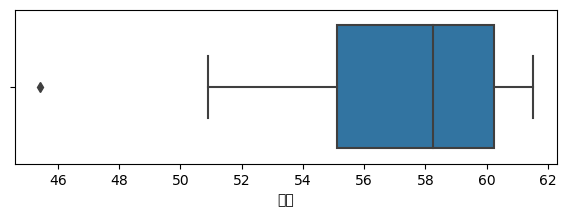

In [14]:
plt.figure(figsize=(7, 2))
sns.boxplot(data=decks['승률'], x=decks['승률'], orient='h')
plt.show()

### Correlation

* 승률과 판수의 상관관계 확인

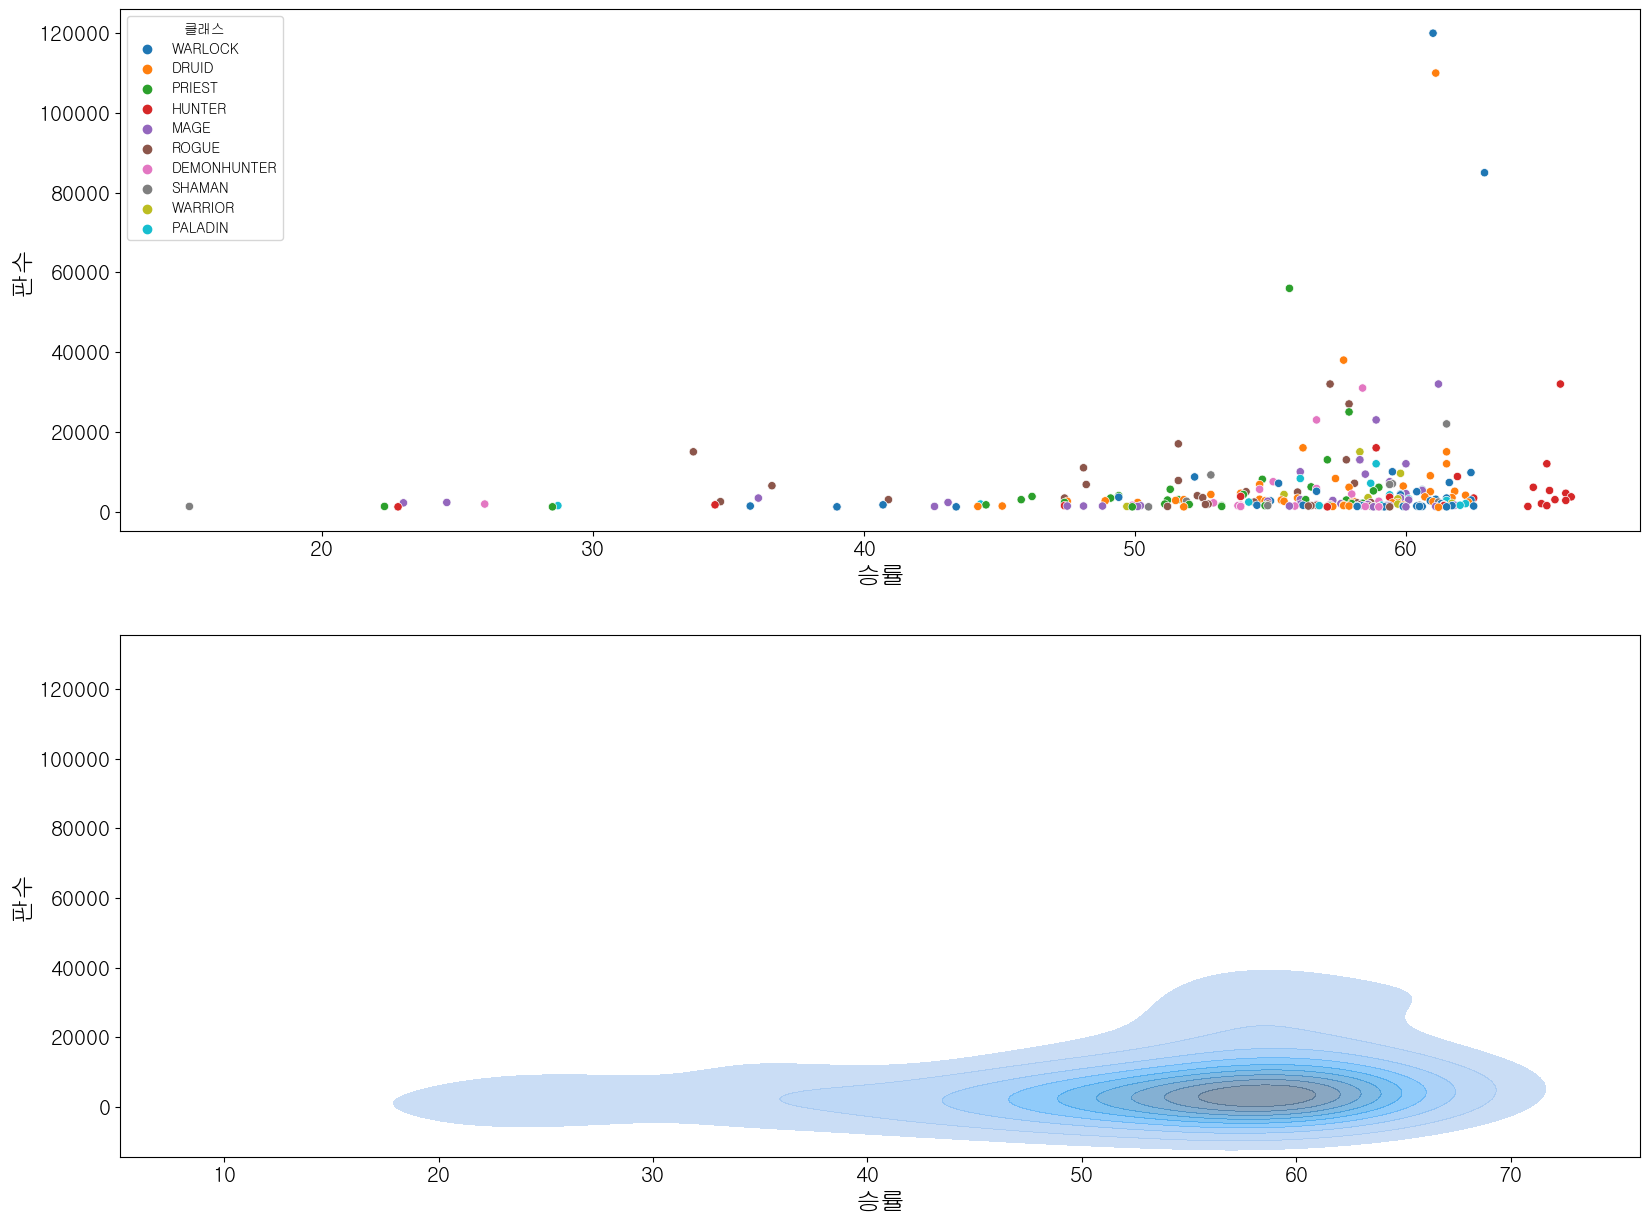

In [11]:
figures, axes = plt.subplots(2)
plt.subplots_adjust(right=2.5, top=2.5, hspace=0.2)
p1 = sns.scatterplot(data=decks, ax=axes[0], x='승률', y='판수', hue='클래스')
p1.set_xlabel('승률', fontsize=18)
p1.set_ylabel('판수', fontsize=18)
p1.tick_params(labelsize=15)
p2 = sns.kdeplot(data=decks, ax=axes[1], x='승률', y='판수', alpha=0.6, fill=True)
p2.set_xlabel('승률', fontsize=18)
p2.set_ylabel('판수', fontsize=18)
p2.tick_params(labelsize=15)

plt.show()

C:\Users\NGY\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
C:\Users\NGY\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from current font.
  fig.canvas.draw()
C:\Users\NGY\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.draw()
C:\Users\NGY\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.draw()
C:\Users\NGY\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  fig.canvas.draw()
C:\Users\NGY\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.draw()
C:\Users\NGY\anaconda3\lib\site-packa

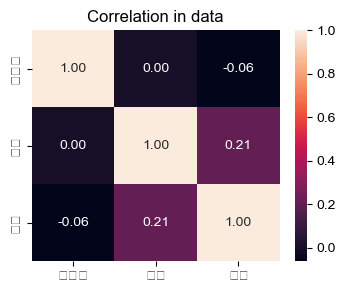

In [23]:
plt.figure(figsize=(4, 3))
plt.title('Correlation in data')
sns.heatmap(decks.corr(), annot=True, fmt=".2f")
plt.show()

### Maximum

#### Deck

##### The most expensive deck

In [24]:
decks[decks["가루량"]==decks["가루량"].max()]

,클래스,이름,가루량,승률,판수
139,HUNTER,야수 사냥꾼,23040,59.8,1000


##### Deck with the most wins

In [25]:
decks[decks["승률"]==decks["승률"].max()]

,클래스,이름,가루량,승률,판수
94,DEATHKNIGHT,Unholy Death Knight,7080,63.6,1600


##### The most played deck

In [26]:
decks[decks["판수"]==decks["판수"].max()]

,클래스,이름,가루량,승률,판수
0,DEATHKNIGHT,Unholy Death Knight,4680,61.1,43000


##### The class with the most decks

In [27]:
decks["클래스"].mode()

0    DEATHKNIGHT
Name: 클래스, dtype: object

#### Class

* 데이터 프레임 생성
    * 악마사냥꾼 : DEMONHUNTER
    * 드루이드 : DRUID
    * 사냥꾼 : HUNTER
    * 마법사 : MAGE
    * 성기사 : PALADIN
    * 사제 : PRIEST
    * 도적 : ROGUE
    * 주술사 : SHAMAN
    * 흑마법사 : WARLOCK
    * 전사 : WARRIOR

In [28]:
classList = ["DEMONHUNTER","DRUID","HUNTER","MAGE","PALADIN","PRIEST","ROGUE","SHAMAN","WARLOCK","WARRIOR"]
classDataframe = []
for className in classList:
    classData = {"클래스":className}
    classDecks = decks[decks["클래스"]==className]
    classData["총 판수"] = classDecks["판수"].sum()
    classData["승률"] = classDecks["승률"].mean()
    classDataframe.append(classData)
classDataframe = pd.DataFrame(classDataframe)
classDataframe

,클래스,총 판수,승률
0,DEMONHUNTER,31440,51.525000
1,DRUID,49190,54.016667
2,HUNTER,55920,59.540000
3,MAGE,147830,53.504651
4,PALADIN,76230,56.659259
5,PRIEST,35840,51.125000
6,ROGUE,50190,49.111765
7,SHAMAN,90250,55.400000
8,WARLOCK,86060,55.025000
9,WARRIOR,13640,52.333333


##### Class with the most wins

In [18]:
classDataframe[classDataframe["승률"]==classDataframe["승률"].max()]

,클래스,총 판수,승률
2,HUNTER,118900,58.972727


##### The most played class

In [19]:
classDataframe[classDataframe["총 판수"]==classDataframe["총 판수"].max()]

,클래스,총 판수,승률
8,WARLOCK,316200,57.1


* 분석 종료 후, 드라이버 종료

In [20]:
driver.quit()

____
* 12월 10일 진행

# LoL

## Summoner info scraping

### Get API Key using Riot API

## https://developer.riotgames.com/

1. 롤 계정 로그인
    * 없을 시, sign up
    * 휴면계정일 경우, 해제 후 게임에 진입하여 닉네임 재설정
    * 재로그인
2. DASHBOARD 진입
    * 로그인 시, 자동 진입
3. DEVELOPMENT API KEY 복사

유효기간은 24시간, 1초에 20개 2분에 100개 제한

In [6]:
api_key = 'RGAPI-78497141-f9b8-4ae8-bd72-6b4cc0a079ad'

### Get summoner info

* summoner_name에 닉네임 할당

In [28]:
summoner_name = "역천괴"
url = "https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/" + summoner_name +'?api_key=' + api_key
summoner_info = requests.get(url).json()
summoner_info

{'id': 'h5_3TDlpC_DXEpHhuP2fYSAxcjUN6SvA9SfakyY8QWbPIJA',
 'accountId': 'MtEgaAYtyJx67Q8iVUFYBPqL_tr-MFq1IVQR9oBZ5tc0gJs',
 'puuid': 'l1Am44_BC3bWaRJo4UvCoQNghmIQD1896ZdWuQqMCORJQHoo5Ouy-7uKQzut9WCTdXRnzPAs6qEeVQ',
 'name': '역천괴',
 'profileIconId': 4856,
 'revisionDate': 1676050026792,
 'summonerLevel': 740}

#### Get the ID of the recent match

In [29]:
puuid = summoner_info['puuid']
count = "100"
url = "https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/"+ puuid + "/ids?api_key=" + api_key +"&count=" + count
match_ids = requests.get(url).json()

In [33]:
matches = []
for match_id in tqdm(match_ids):
    match = {}
    url = "https://asia.api.riotgames.com/lol/match/v5/matches/"+match_id+"?api_key="+api_key
    result = requests.get(url).json()
    if 'status' in result : continue
    match['매치아이디'] = match_id
    match['게임모드'] = result['info']['gameMode']
    match['매치시간'] = result['info']['gameStartTimestamp']
    my_participants = list(filter(lambda x: x['summonerName']==summoner_name, result['info']['participants']))[0]
    match['챔피언'] = my_participants['championName']
    match['킬'] = my_participants['kills']
    match['데스'] = my_participants['deaths']
    match['어시스트'] = my_participants['assists']
    match['결과'] = '승리' if my_participants['win'] else '패배'
    matches.append(match)
matches = pd.DataFrame(matches)
matches.head()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.76it/s]


,매치아이디,게임모드,매치시간,챔피언,킬,데스,어시스트,결과
0,KR_6355928822,CLASSIC,1676049094820,Ashe,4,5,29,승리
1,KR_6355859615,CLASSIC,1676046505991,Caitlyn,5,10,27,승리
2,KR_6355794540,CLASSIC,1676044497935,Ashe,5,4,22,승리
3,KR_6355717745,CLASSIC,1676042641744,Karma,6,4,12,패배
4,KR_6355623938,CLASSIC,1676040404637,Annie,2,5,27,승리


### Data analysis

#### Keyboard input frequency

##### Installation

In [12]:
pip install pynput

     ---------------------------------------- 89.2/89.2 kB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


##### How to use

* 아래 셀을 가급적 실행하지 말 것
    * 주피터 노트북 상에도 동작은 하지만 웹에서 동작하는 것만큼 입력에 제한을 받음
* 파이썬이 설치되었다는 가정하에, 파이썬 파일 작성
* 실제 수업에선 직접 타이핑하고 확인하는 시간을 가져보면 시간 면에서 좋을듯함
    * 실제 인게임에서도 작동이 되는지 등
* 쓸데없는 입력을 방지하고자 게임 직전에 실행, 더블 모니터 이상이면 상관없음
* F4 입력하면 종료
    * 종료됨과 동시에 플로팅 및 파일 저장
    * 데이터는 덮어쓰기 형식으로 데이터가 누적되도록 함
* 채팅에 사용하는 타이핑은 안 받도록 플래그 처리해둠

##### Code

In [ ]:
'''
from pynput.keyboard import Key, Listener
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


class main:
    def __init__(self):
        self.key_frequency = {'q': 0, 'w': 0, 'e': 0, 'r': 0, 'd': 0, 'f': 0, '1': 0, '2': 0, '3': 0, '5': 0, '6': 0,
                              '7': 0, '4': 0}
        self.flag = 1

    def on_release(self, key):
        data = str(key)[1:-1].lower()

        if key == Key.enter:
            self.flag *= -1

        if self.flag == 1 and data in self.key_frequency.keys():
            self.key_frequency[data] += 1

        print('{0} release'.format(key))
        if key == Key.f4:
            return False

    def convert_df(self):
        return pd.DataFrame(self.key_frequency, index=[0])

    def save_df(self):
        if not os.path.exists('key_freq.csv'):
            self.convert_df().to_csv('key_freq.csv', mode='w', index=False)
        else:
            self.convert_df().to_csv('key_freq.csv', mode='a', index=False, header=False)

    def visualize(self):
        key_df = self.convert_df()

        x = np.arange(len(key_df.columns))
        plt.figure(figsize=(6, 6))
        plt.title('Keyboard Frequency')
        plt.grid(axis='y')
        plt.xticks(x, key_df.columns)
        plt.bar(x, key_df.iloc[-1])
        plt.show()

    def run(self):
        print('Recording start..\n')
        with Listener(on_release=self.on_release) as listener:
            listener.join()
        self.save_df()
        self.visualize()


if __name__ == '__main__':
    main().run()
'''

In [18]:
key_df = pd.read_csv('./빈도 체크/key_freq.csv')
key_df

,q,w,e,r,d,f,1,2,3,5,6,7,4
0,36,49,39,12,5,2,0,2,0,1,0,0,0


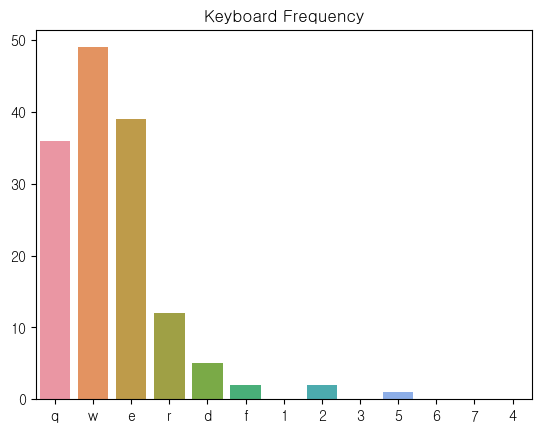

In [28]:
plt.title('Keyboard Frequency')
sns.barplot(x=key_df.columns, y=key_df.values[0])
plt.show()

#### 칼바람

In [34]:
aram_matches = matches[matches['게임모드'] == 'ARAM']
aram_matches.head()

,매치아이디,게임모드,매치시간,챔피언,킬,데스,어시스트,결과
90,KR_6299992990,ARAM,1673284777608,Gangplank,9,11,15,승리


##### KDA

In [35]:
aram_ka_per_d = (aram_matches['킬'].sum() + aram_matches['어시스트'].sum())/aram_matches['데스'].sum()
print('KDA :',round(aram_ka_per_d,4))

KDA : 2.1818


##### The most played champ

In [36]:
aram_most_champion = aram_matches['챔피언'].mode()[0]
print('가장 많이 플레이한 챔피언 :',aram_most_champion)

가장 많이 플레이한 챔피언 : Gangplank


##### Winning rate

In [16]:
aram_win_rate = len(aram_matches[aram_matches['결과'] == '승리']) / len(aram_matches)
print('승률 :', round(aram_win_rate*100,4),"%")

승률 : 18.1818 %


#### 일반게임

In [37]:
classic_matches = matches[matches['게임모드'] == 'CLASSIC']
classic_matches.head()

,매치아이디,게임모드,매치시간,챔피언,킬,데스,어시스트,결과
0,KR_6355928822,CLASSIC,1676049094820,Ashe,4,5,29,승리
1,KR_6355859615,CLASSIC,1676046505991,Caitlyn,5,10,27,승리
2,KR_6355794540,CLASSIC,1676044497935,Ashe,5,4,22,승리
3,KR_6355717745,CLASSIC,1676042641744,Karma,6,4,12,패배
4,KR_6355623938,CLASSIC,1676040404637,Annie,2,5,27,승리


##### KDA

In [38]:
classic_ka_per_d = (classic_matches['킬'].sum() + classic_matches['어시스트'].sum())/classic_matches['데스'].sum()
print('KDA :',round(classic_ka_per_d,4))

KDA : 2.4032


##### The most played champ

In [39]:
classic_most_champion = classic_matches['챔피언'].mode()[0]
print('가장 많이 플레이한 챔피언 :',classic_most_champion)

가장 많이 플레이한 챔피언 : Ashe


##### Winning rate

In [40]:
classic_win_rate = len(classic_matches[classic_matches['결과'] == '승리']) / len(classic_matches)
print('승률 :', round(classic_win_rate*100,4),"%")

승률 : 53.6082 %


##### Average

* 데이터 프레임 생성

In [41]:
res = np.array([])
classinc_avg = classic_matches
for champ in np.unique(classinc_avg['챔피언'].values):
    data = classinc_avg.loc[classinc_avg['챔피언']== champ , '킬':].values
    np.place(data, data == '승리', 1)
    np.place(data, data == '패배', 0)
    match_num = len(data)
    data = data.mean(axis=0)
    data = np.append(data, match_num)
    res = np.append(res, data)

res = pd.DataFrame(res.reshape(-1, 5))
res.index = np.unique(classinc_avg['챔피언'].values)
res.columns = ['평균 킬', '평균 데스', '평균 어시스트', '평균 승률', '매치 수']
res.head()

,평균 킬,평균 데스,평균 어시스트,평균 승률,매치 수
Ahri,3.0,1.0,5.0,0.0,1
Akali,2.0,0.0,0.0,0.0,1
Akshan,7.0,16.0,14.0,0.0,1
Annie,2.0,5.0,27.0,1.0,1
Ashe,2.321429,5.321429,14.214286,0.678571,28


* 매치 수에 따른 플레이 횟수
    * 1번만 플레이한 매치 = 24 = 24개의 챔프로 한 번씩만 플레이
    * 3번 플레이한 매치 = 3 = 3개의 챔프로 3번씩 플레이

In [42]:
res['매치 수'].value_counts()

1     20
3      7
2      5
28     1
5      1
6      1
7      1
Name: 매치 수, dtype: int64

In [43]:
res[res['매치 수'] == 1]

,평균 킬,평균 데스,평균 어시스트,평균 승률,매치 수
Ahri,3.0,1.0,5.0,0.0,1
Akali,2.0,0.0,0.0,0.0,1
Akshan,7.0,16.0,14.0,0.0,1
Annie,2.0,5.0,27.0,1.0,1
Ezreal,4.0,5.0,8.0,1.0,1
Fiora,0.0,5.0,0.0,0.0,1
Gragas,4.0,3.0,5.0,1.0,1
Jax,6.0,8.0,2.0,1.0,1
Jayce,5.0,12.0,10.0,0.0,1
Karthus,7.0,18.0,16.0,0.0,1


C:\Users\NGY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NGY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NGY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53420 (\N{HANGUL SYLLABLE KIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NGY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NGY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NGY\anaconda3\lib\site-

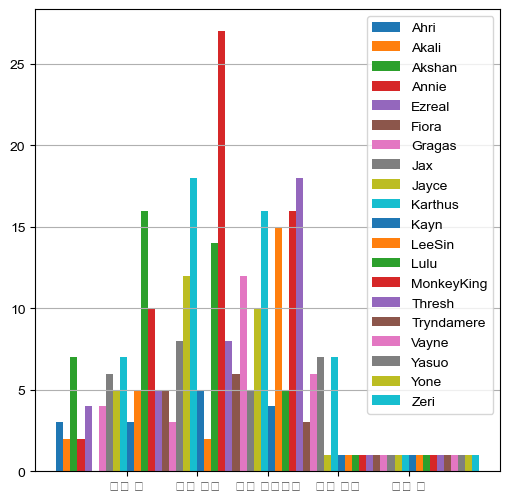

In [44]:
x = np.arange(5)
w = 0.1

# 공통 매치 수로 비교하기
Champ = res[res['매치 수'] == 1].index
Data = [res.loc[Champ[i]] for i in range(len(Champ))]

'''
챔프명 입력 받아서 비교하기
Champ = input().split()
Data = [res.loc[Champ[i]] for i in range(len(Champ))]
'''

plt.figure(figsize=(6, 6))
plt.grid(axis='y')
plt.xticks(x, ['평균 킬', '평균 데스', '평균 어시스트', '평균 승률', '매치 수'])

for i in range(len(Champ)):
    pos = x + w*(i-(len(Champ)-1)*0.5)
    plt.bar(pos, Data[i], width=w, label=Data[i].name)
plt.legend()
plt.show()

* 한 번만 플레이한 챔프들에 대해서

C:\Users\NGY\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.draw()
C:\Users\NGY\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.draw()
C:\Users\NGY\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 53420 (\N{HANGUL SYLLABLE KIL}) missing from current font.
  fig.canvas.draw()
C:\Users\NGY\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.draw()
C:\Users\NGY\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.draw()
C:\Users\NGY\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.draw()
C:\Users\NGY\anaconda3\lib\site-packag

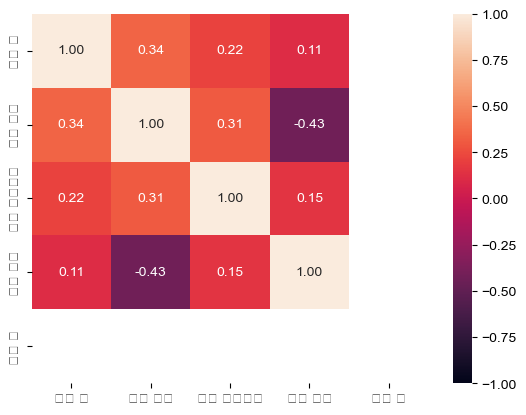

In [45]:
sns.heatmap(data=res[res['매치 수'] == 1].astype('float64').corr(), vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.show()

##### Result of the most played champ

In [46]:
test = matches[matches['챔피언'] == classic_most_champion].loc[:, '킬':]
test

,킬,데스,어시스트,결과
0,4,5,29,승리
2,5,4,22,승리
10,1,9,21,승리
20,3,6,19,승리
26,2,9,9,패배
34,1,6,10,패배
43,5,7,20,승리
56,7,5,12,패배
64,4,4,24,승리
66,2,5,5,패배


C:\Users\NGY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NGY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NGY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NGY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NGY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\NGY\anaconda3\lib\site-packag

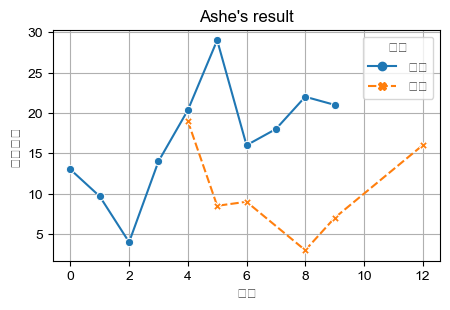

In [47]:
plt.figure(figsize=(5,3))
plt.title(classic_most_champion+'\'s result')
plt.grid()
sns.lineplot(data=test, x='데스', y='어시스트', hue='결과', style='결과', markers= ["o","X"], ci=None)
plt.show()

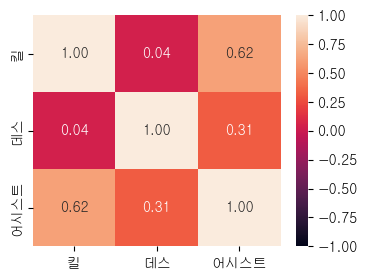

In [98]:
plt.figure(figsize=(4,3))
sns.heatmap(data=test.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.show()

## Champion info scraping

* 스크래핑할 사이트: OP.GG
> https://www.op.gg/
    * 데이터는 알파벳 기준 정렬되어 수집
    * 한글로 가져오는 방법은 따로 다루지 않음, 원할 경우 구글 참조 바람

* 포지션 태그에 해당하는 챔피언이름 불러오기
    * 탑 : top
    * 미드 : mid
    * 원딜(바텀) : adc
    * 서폿 : support
    * 정글 : jungle

In [95]:
chrome_ver = chromedriver_autoinstaller.get_chrome_version().split('.')[0]
s = Service(f'./{chrome_ver}/chromedriver.exe')

try:
    driver = webdriver.Chrome(service=s)   
except:
    chromedriver_autoinstaller.install(True)
    driver = webdriver.Chrome(service=s)

driver.implicitly_wait(10)

In [96]:
position = "top"
url = "https://www.op.gg/champions?region=global&tier=platinum_plus&position="+position
html = urlopen(url)
bsObject = BeautifulSoup(html, "html.parser") 
championList = [a["href"].split("/")[2] for a in bsObject.select(".e1oulx2j7 > tbody > tr > .e1oulx2j6 > a")]

* 가져올 챔피언의 수를 지정

In [5]:
champ = 7

In [97]:
championList = championList[:champ]

win_rates = []
for num, champion in enumerate(championList):
    champion_win_rates = {}
    progress_desc = str(num+1)+". "+champion+"("+str(num+1)+"/"+str(len(championList))+")"
    for target_champion in tqdm(championList, desc=progress_desc):
        if champion == target_champion: champion_win_rates[target_champion] = None
        else:
            url = "https://www.op.gg/champions/"+champion+"/"+position+"/counters?region=global&tier=platinum_plus&target_champion="+target_champion
            driver.get(url)
            bsObject = BeautifulSoup(driver.page_source, "html.parser") 
            win_rate = bsObject.select("#content-header > div:nth-child(1) > div:nth-child(3) > div > div.ew1oorz8 > div:nth-child(3) > div.ew1oorz5")[0].get_text().replace("%","").strip()
            champion_win_rates[target_champion] = float(win_rate) if win_rate != '-' else np.nan
            time.sleep(3)
    win_rates.append(champion_win_rates);
win_rates = pd.DataFrame(win_rates)
win_rates.index = championList
win_rates

7. drmundo(7/7): 100%|███████████████████████████████████████████████████████████████████| 7/7 [00:38<00:00,  5.57s/it]


,aatrox,akali,akshan,camille,chogath,darius,drmundo
aatrox,NaN,58.33,44.44,48.19,46.27,46.71,55.19
akali,41.67,NaN,NaN,41.90,51.72,46.20,50.44
akshan,55.56,NaN,NaN,38.78,NaN,56.82,62.86
camille,51.81,58.10,61.22,NaN,54.69,48.05,44.37
chogath,53.73,48.28,NaN,45.31,NaN,46.77,41.80
darius,53.29,53.80,43.18,51.95,53.23,NaN,44.74
drmundo,44.81,49.56,37.14,55.63,58.20,55.26,NaN


* 첫 문자 대문자로 변경
    * 단순 편의를 위함

In [98]:
label = [i[0].upper()+i[1:] for i in win_rates.columns]

In [99]:
win_rates.index = win_rates.columns = label

In [100]:
win_rates

,Aatrox,Akali,Akshan,Camille,Chogath,Darius,Drmundo
Aatrox,NaN,58.33,44.44,48.19,46.27,46.71,55.19
Akali,41.67,NaN,NaN,41.90,51.72,46.20,50.44
Akshan,55.56,NaN,NaN,38.78,NaN,56.82,62.86
Camille,51.81,58.10,61.22,NaN,54.69,48.05,44.37
Chogath,53.73,48.28,NaN,45.31,NaN,46.77,41.80
Darius,53.29,53.80,43.18,51.95,53.23,NaN,44.74
Drmundo,44.81,49.56,37.14,55.63,58.20,55.26,NaN


### Data analysis

* 결측치 대체
    * 데이터가 쌓이지 않았거나 미러전에 대해선 결측치 발생
    * 편의를 위해 대체

In [101]:
win_rates = win_rates.fillna(0)

#### Counter matchup comparison

* 챔피언 간의 승률 확인

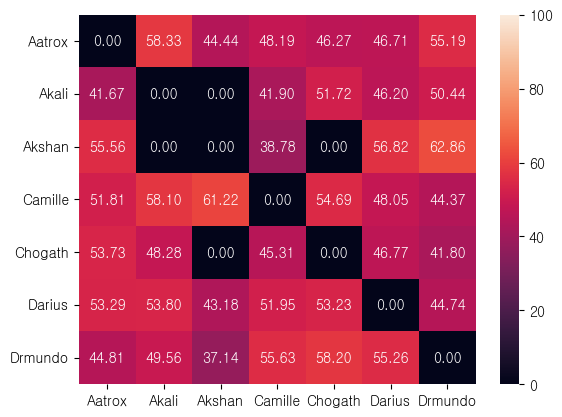

In [102]:
chart = sns.heatmap(win_rates, annot=True, fmt=".2f", vmin=0.0, vmax=100.0)

chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
chart.set_yticklabels(chart.get_yticklabels(), rotation=0)

plt.show()

In [35]:
driver.quit()

#### Check the trend

* 2년 전 인터뷰이지만 OP.GG 데이터 분석가 피셜, 승률 변화를 확인하면 어떤 챔피언이 좋은지 캐치할 수 있다고 함

In [82]:
chrome_ver = chromedriver_autoinstaller.get_chrome_version().split('.')[0]
s = Service(f'./{chrome_ver}/chromedriver.exe')

try:
    driver = webdriver.Chrome(service=s)   
except:
    chromedriver_autoinstaller.install(True)
    driver = webdriver.Chrome(service=s)

driver.implicitly_wait(10)

In [76]:
position = "adc"
url = "https://www.op.gg/champions?region=global&tier=platinum_plus&position="+position
html = urlopen(url)
bsObject = BeautifulSoup(html, "html.parser") 
championList = [a["href"].split("/")[2] for a in bsObject.select(".e1oulx2j7 > tbody > tr > .e1oulx2j6 > a")]

* 가져올 챔피언의 수를 지정

In [77]:
champ = 7

* 패치 날짜를 가져옴
    * 날짜는 한 번만 가져오면 되기 때문에 따로 분리

In [79]:
for _ in tqdm(range(1)):
    champion = championList[0]
    url = "https://www.op.gg/champions/"+champion+"/"+position+"/trends?region=global&tier=platinum_plus"
    driver.get(url)
    time.sleep(3)
    bsObject = BeautifulSoup(driver.page_source, "html.parser")
    patch_date = bsObject.select("#content-container > section:nth-child(1) > div:nth-child(3) > \
                                                div:nth-child(1) > svg > g:nth-child(2) > g > g > text > tspan")
    patch_date = [date.get_text() for date in patch_date]
patch_date

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:35<00:00, 35.78s/it]


['12.14',
 '12.15',
 '12.16',
 '12.17',
 '12.18',
 '12.19',
 '12.20',
 '12.21',
 '12.22',
 '12.23']

* 승률 트렌드 데이터 스크래핑

In [84]:
championList = championList[:champ]
trends = []

for num, champion in enumerate(championList):
    trend = []
    progress_desc = str(num+1)+". "+champion+"("+str(num+1)+"/"+str(len(championList))+")"
    for _ in tqdm(range(1), desc=progress_desc):
        url = "https://www.op.gg/champions/"+champion+"/"+position+"/trends?region=global&tier=platinum_plus"
        driver.get(url)
        time.sleep(3)
        bsObject = BeautifulSoup(driver.page_source, "html.parser")
        trend = bsObject.select("#content-container > section:nth-child(1) > div:nth-child(3) > \
                                        div:nth-child(1) > svg > g:nth-child(4) > g:nth-child(3) > text > tspan")
    trend = [i.get_text()[:-1] for i in trend]
    trends.append(trend)  
trends = pd.DataFrame(trends, index=championList, columns=patch_date)
trends

7. jinx(7/7): 100%|██████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.26s/it]


,12.14,12.15,12.16,12.17,12.18,12.19,12.20,12.21,12.22,12.23
aphelios,27,27,26,26,25,24,24,24,26,26
ashe,11,11,16,12,10,11,11,13,9,16
caitlyn,17,17,13,15,15,15,15,16,13,14
draven,5,10,17,16,14,13,13,10,15,9
ezreal,25,24,25,21,20,22,19,21,24,22
jhin,9,9,9,8,8,10,8,5,5,5
jinx,23,19,20,20,18,9,10,9,17,15


* 왜인지 가끔 데이터들이 안 가져올 때가 있는데 비효율적이지만 while문으로 받을 때까지 반복할 수 있도록 아래 코드를 사용해 주세요.
    * 일단 위에 코드는 수정해 본다고 수정한 코드이긴 합니다.
    * 확인된 것 중 하나는 스크래핑하는 크롬창을 최소화하면 오래 걸리거나 안 되는 부분이 있는 듯합니다.

```
championList = championList[:champ]
trends = []

for num, champion in enumerate(championList):
    trend = []
    progress_desc = str(num+1)+". "+champion+"("+str(num+1)+"/"+str(len(championList))+")"
    for _ in tqdm(range(1), desc=progress_desc):
        while not trend:
            url = "https://www.op.gg/champions/"+champion+"/"+position+"/trends?region=global&tier=platinum_plus"
            driver.get(url)
            time.sleep(3)
            bsObject = BeautifulSoup(driver.page_source, "html.parser")
            trend = bsObject.select("#content-container > section:nth-child(1) > div:nth-child(3) > \
                                        div:nth-child(1) > svg > g:nth-child(4) > g:nth-child(3) > text > tspan")
        print(trend)
        trend = [i.get_text()[:-1] for i in trend]
    trends.append(trend)  
trends = pd.DataFrame(trends, index=championList, columns=patch_date)
trends
```

* 첫 문자 대문자로 변경

In [106]:
label = [i[0].upper()+i[1:] for i in trends.index]
trends.index = label

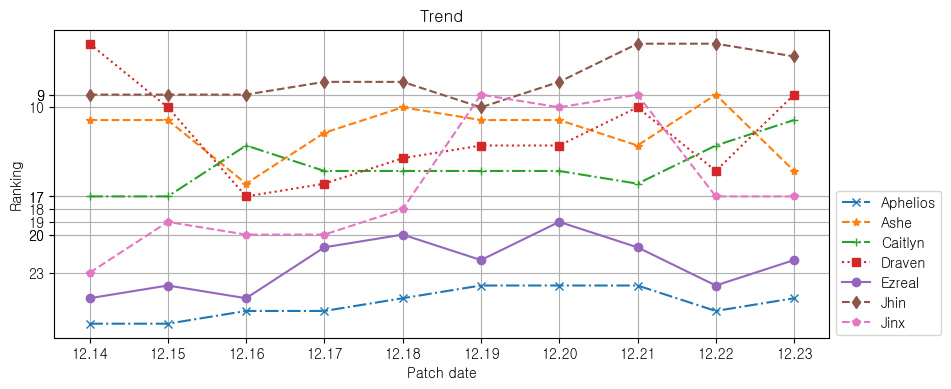

In [107]:
plt.figure(figsize=(10, 4))
plt.title('Trend')
plt.grid()
plt.xlabel('Patch date')
plt.ylabel('Ranking')
makers_dash = ['x-.', '*--', '+-.', 's:', 'o-', 'd--', 'p--',]

for idx, champ in enumerate(trends.index):
    y = np.array(trends.loc[champ]).astype(int)
    plt.yticks(-y, y)
    plt.plot(trends.columns, -y.astype(int), makers_dash[idx], label=trends.loc[champ].name)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

In [17]:
driver.quit()